In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
import pyNetLogo

In [2]:
netlogo = pyNetLogo.NetLogoLink(gui=True)
netlogo.load_model(r'Wolf Sheep Predation_v6.nlogo')
netlogo.command('setup')

In [3]:
print(netlogo.netlogo_version)

6


In [4]:
agent_xy = pd.read_excel('xy_DataFrame.xlsx')
agent_xy[['who', 'xcor', 'ycor']].head(5)

,who,xcor,ycor
0,0,-24.000000,-24.000000
1,1,-23.666667,-23.666667
2,2,-23.333333,-23.333333
3,3,-23.000000,-23.000000
4,4,-22.666667,-22.666667


In [5]:
netlogo.write_NetLogo_attriblist(agent_xy[['who','xcor','ycor']], 'a-sheep')

In [6]:
x = netlogo.report('map [s -> [xcor] of s] sort sheep')
y = netlogo.report('map [s -> [ycor] of s] sort sheep')

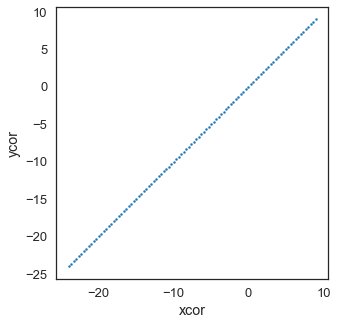

In [7]:
fig, ax = plt.subplots(1)

ax.scatter(x, y, s=4)
ax.set_xlabel('xcor')
ax.set_ylabel('ycor')
ax.set_aspect('equal')
fig.set_size_inches(5,5)

plt.show()

In [8]:
netlogo.command('repeat 100 [go]')
x = netlogo.report('map [s -> [xcor] of s] sort sheep')
y = netlogo.report('map [s -> [ycor] of s] sort sheep')

energy_sheep = netlogo.report('map [s -> [energy] of s] sort sheep')
energy_wolves = netlogo.report('[energy] of wolves')


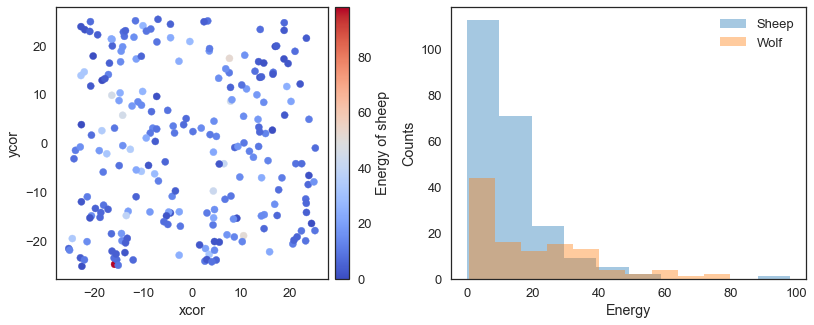

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 2)
sc = ax[0].scatter(x, y, s=50, c=energy_sheep, cmap=plt.cm.coolwarm)
ax[0].set_xlabel('xcor')
ax[0].set_ylabel('ycor')
ax[0].set_aspect('equal')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar = plt.colorbar(sc, cax=cax, orientation='vertical')
cbar.set_label('Energy of sheep')

sns.distplot(energy_sheep, kde=False, bins=10, ax=ax[1], label='Sheep')
sns.distplot(energy_wolves, kde=False, bins=10, ax=ax[1], label='Wolf')
ax[1].set_xlabel('Energy')
ax[1].set_ylabel('Counts')
ax[1].legend()
fig.set_size_inches(14,5)

plt.show()

In [10]:
counts = netlogo.repeat_report(['count wolves', 'count sheep'], 200, go='go')

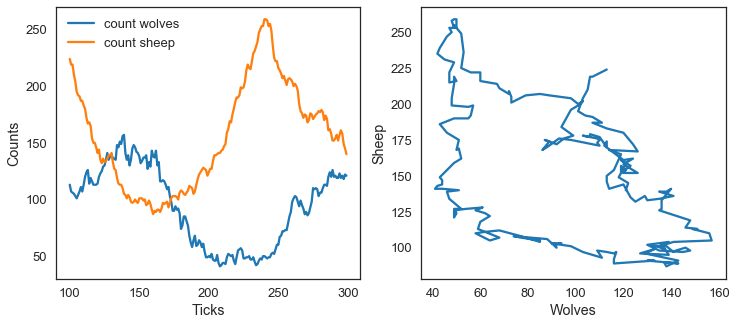

In [11]:
fig, ax = plt.subplots(1,2)

counts.plot(x=counts.index, ax=ax[0])
ax[0].set_xlabel('Ticks')
ax[0].set_ylabel('Counts')
ax[1].plot(counts['count wolves'], counts['count sheep'])
ax[1].set_xlabel('Wolves')
ax[1].set_ylabel('Sheep')
fig.set_size_inches(12,5)

plt.show()

#### $$E_X[Var_{Y|X}(Y|X)]+Var_{Y|X}[E(Y|X)]=Var(Y)$$